In [1]:
# 🧩 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from ipywidgets import Dropdown, IntSlider, VBox, interactive_output


In [4]:
#Dataset
from google.colab import files
files.upload()  # Upload kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d omarsobhy14/5g-quality-of-service
!unzip 5g-quality-of-service.zip

import pandas as pd

df = pd.read_csv('Quality of Service 5G.csv')
df.head()



Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/omarsobhy14/5g-quality-of-service
License(s): other
Archive:  5g-quality-of-service.zip
  inflating: Quality of Service 5G.csv  


,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%


In [5]:
# 📂 Step 2: Load and Preprocess Dataset
df = pd.read_csv('Quality of Service 5G.csv')
df.drop(['Timestamp', 'User_ID'], axis=1, inplace=True)
df['Signal_Strength'] = df['Signal_Strength'].str.replace(' dBm', '').astype(float)
df['Latency'] = df['Latency'].str.replace(' ms', '').astype(float)

def convert_bandwidth(value):
    if 'Mbps' in value:
        return float(value.replace(' Mbps', ''))
    elif 'Kbps' in value:
        return float(value.replace(' Kbps', '')) / 1000
    else:
        return float(value)

df['Required_Bandwidth'] = df['Required_Bandwidth'].apply(convert_bandwidth)
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].apply(convert_bandwidth)
df['Resource_Allocation'] = df['Resource_Allocation'].str.replace('%', '').astype(float)

le = LabelEncoder()
df['Application_Type'] = le.fit_transform(df['Application_Type'])


In [6]:
# 🧠 Step 3: Train Machine Learning Model
X = df.drop(['Resource_Allocation'], axis=1)
y = df['Resource_Allocation']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

joblib.dump(model, 'resource_allocator_model.pkl')


Mean Squared Error: 7.437749999999999
R² Score: 0.9151146181623646


['resource_allocator_model.pkl']

<ipython-input-7-45d80c4545d7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


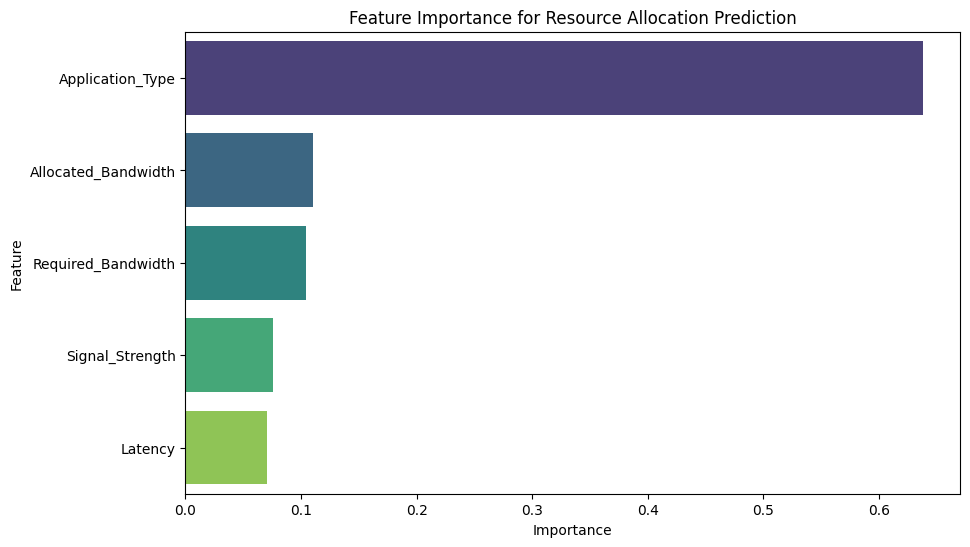

In [7]:
# 📊 Step 4: Feature Importance Visualization
importances = model.feature_importances_
feature_names = df.drop(['Resource_Allocation'], axis=1).columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance for Resource Allocation Prediction')
plt.show()



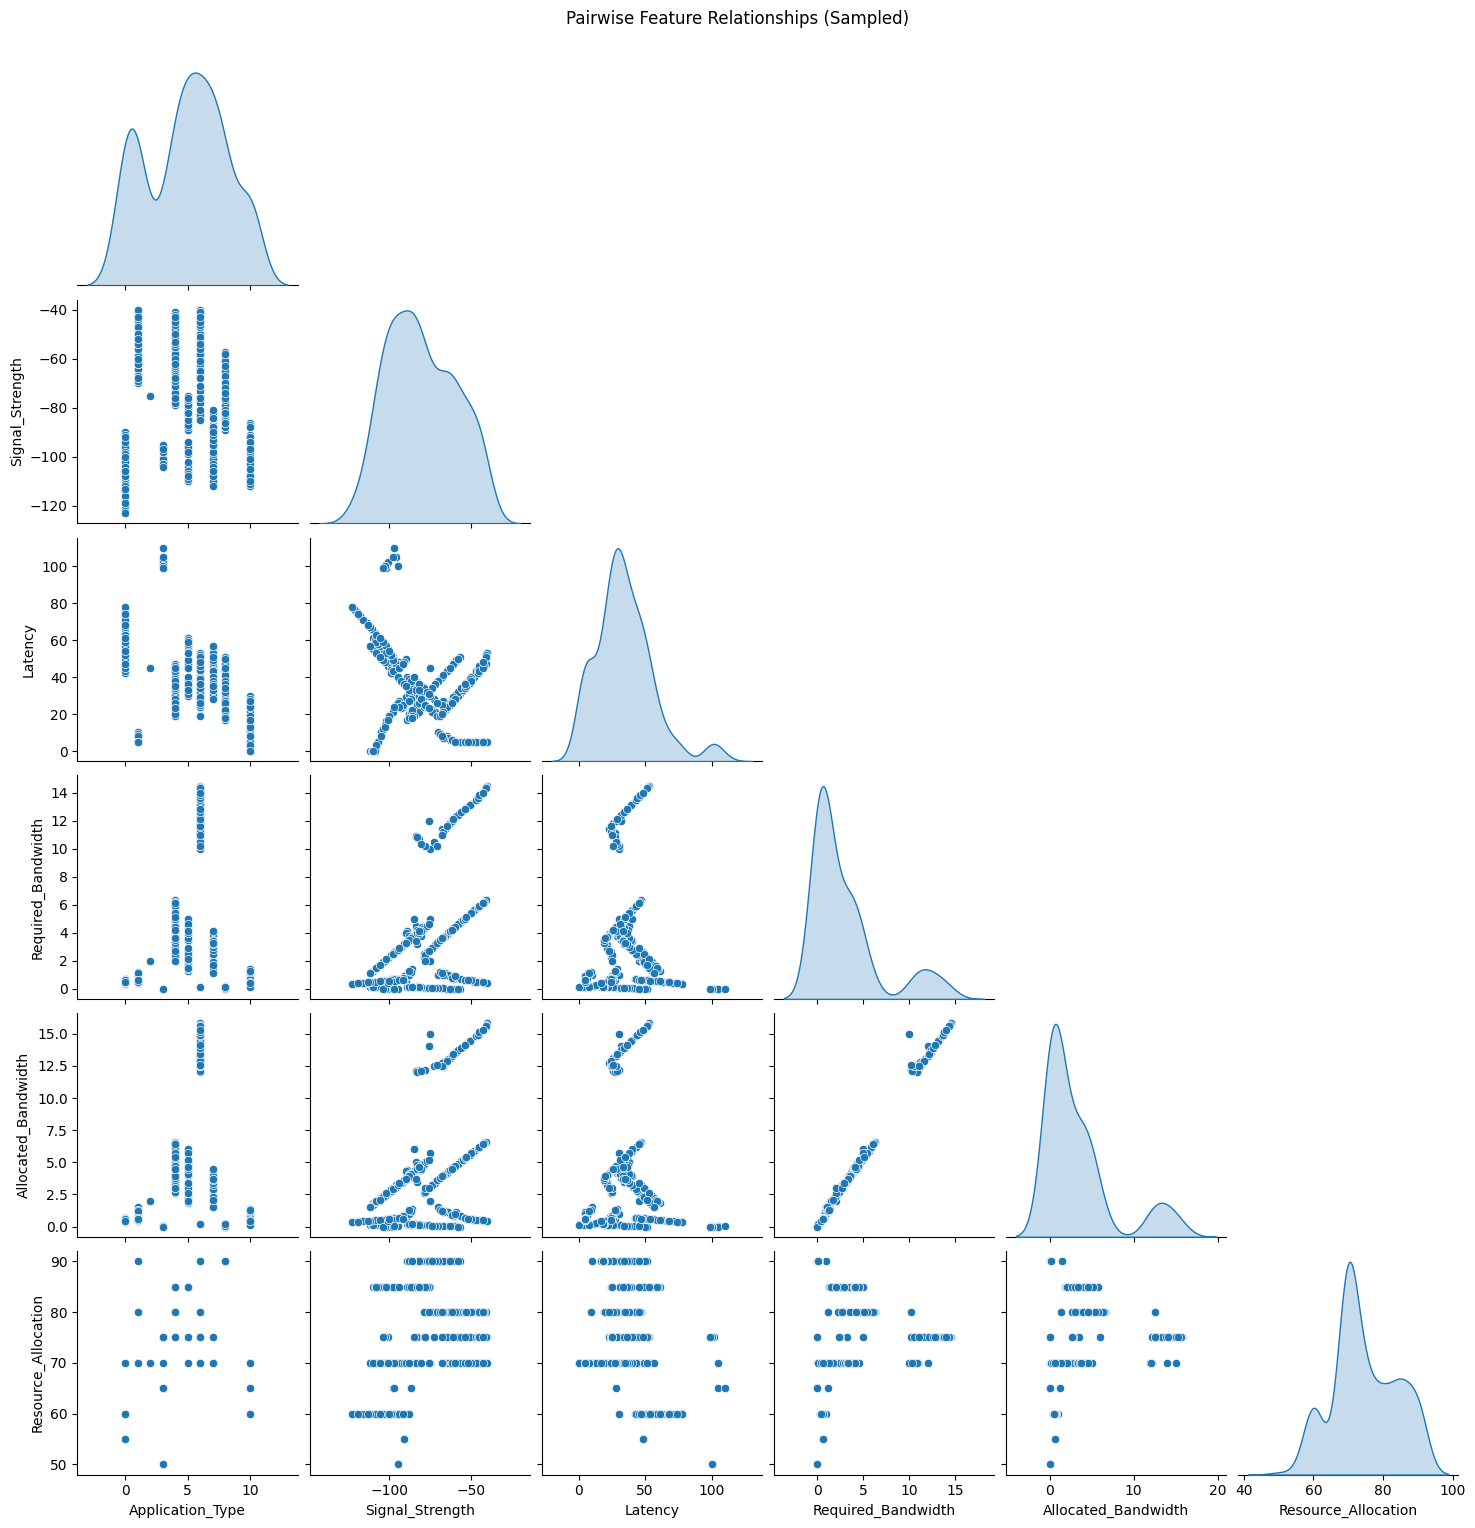

In [14]:
sampled_df = df.sample(300, random_state=42)
sns.pairplot(sampled_df, diag_kind='kde', corner=True)
plt.suptitle('Pairwise Feature Relationships (Sampled)', y=1.02)
plt.show()


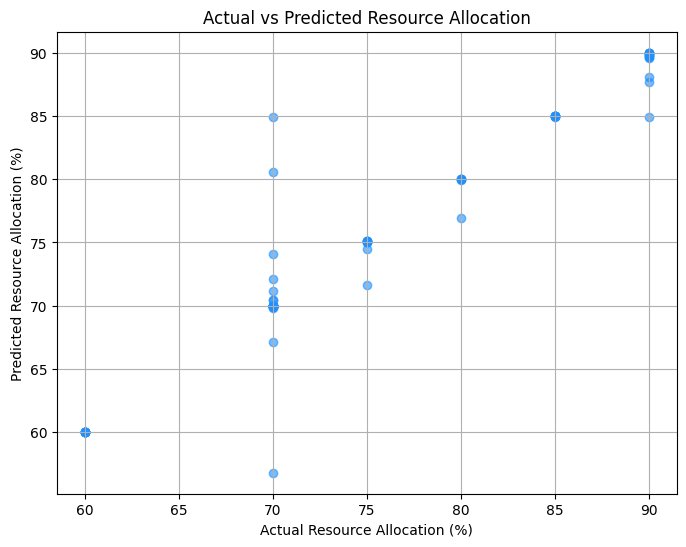

In [8]:
# 🎯 Step 5: Actual vs Predicted Allocation
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='dodgerblue')
plt.xlabel('Actual Resource Allocation (%)')
plt.ylabel('Predicted Resource Allocation (%)')
plt.title('Actual vs Predicted Resource Allocation')
plt.grid(True)
plt.show()


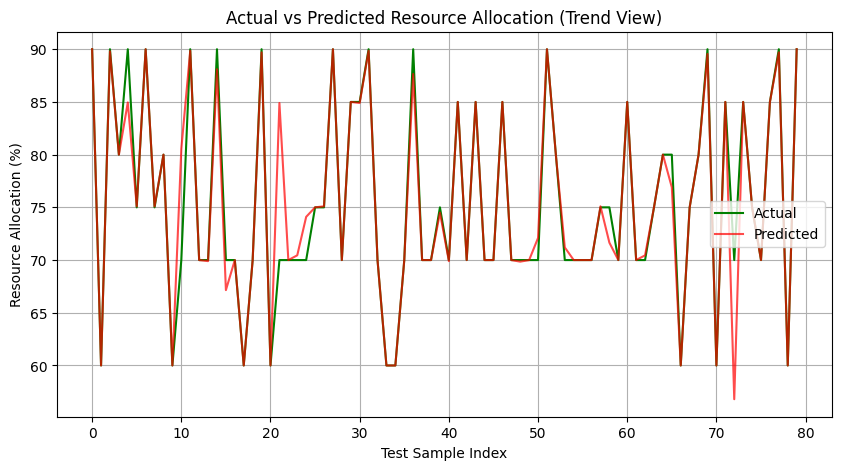

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test.values, label='Actual', color='green')
plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red', alpha=0.7)
plt.title('Actual vs Predicted Resource Allocation (Trend View)')
plt.xlabel('Test Sample Index')
plt.ylabel('Resource Allocation (%)')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
qos_profiles = pd.DataFrame({
    'Application': ['IoT Device', 'Streaming Video', 'Online Gaming', 'VR/AR'],
    'Latency Requirement (ms)': [50, 200, 30, 10],
    'Bandwidth (Mbps)': [0.1, 5, 10, 25],
    'Jitter Tolerance (ms)': [50, 100, 20, 5]
})
qos_profiles.style.set_caption("📘 5G Application QoS Requirements")


,Application,Latency Requirement (ms),Bandwidth (Mbps),Jitter Tolerance (ms)
0,IoT Device,50,0.100000,50
1,Streaming Video,200,5.000000,100
2,Online Gaming,30,10.000000,20
3,VR/AR,10,25.000000,5


In [28]:
from ipywidgets import Dropdown, IntSlider, VBox, interactive_output

# Dropdowns for user context
device_type = Dropdown(options=['Smartphone', 'IoT Device', 'Streaming Device', 'VR Headset'], description='Device')
user_speed = IntSlider(value=30, min=0, max=300, step=10, description='Speed (km/h)')
base_station_load = IntSlider(value=50, min=0, max=100, step=5, description='BS Load (%)')

def simulate_conditions(device, speed, load):
    fig, ax = plt.subplots(figsize=(8, 4))

    text = (
        f"📱 Device Type: {device}\n"
        f"🚗 User Speed: {speed} km/h\n"
        f"📶 Base Station Load: {load}%\n\n"
        f"🧠 Model estimates:\n"
    )

    if device == 'VR Headset':
        req = 'High Bandwidth + Low Latency'
    elif device == 'Streaming Device':
        req = 'High Bandwidth'
    elif device == 'IoT Device':
        req = 'Low Bandwidth + Low Power'
    else:
        req = 'Moderate Bandwidth & Latency'

    if speed > 200:
        mobility_factor = 'High Doppler shift – Unstable channel'
    elif speed > 100:
        mobility_factor = 'Medium Doppler – Reduced reliability'
    else:
        mobility_factor = 'Stable channel'

    load_effect = 'High competition for resources' if load > 70 else 'Balanced load'

    ax.text(0.1, 0.9, text + f"- 📊 Requirements: {req}\n- 🛰️ Channel Status: {mobility_factor}\n- ⚖️ Load Effect: {load_effect}",
            fontsize=12, va='top')
    ax.axis('off')
    plt.title("Dynamic 5G Conditions Simulation")
    plt.show()

display(VBox([device_type, user_speed, base_station_load]),
        interactive_output(simulate_conditions, {
            'device': device_type,
            'speed': user_speed,
            'load': base_station_load
        }))


Output()

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ipywidgets import IntSlider, VBox, interactive_output

def plot_allocation(user1, user2, user3, user4):
    total = user1 + user2 + user3 + user4
    if total == 0:
        user1 = user2 = user3 = user4 = 1
        total = 4

    allocations = [user1, user2, user3, user4]
    percentages = [round(a / total * 100, 1) for a in allocations]
    colors = ['green', 'blue', 'red', 'purple']
    users = [(1, 1), (2, 7), (8, 1), (9, 7)]

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.add_patch(patches.Rectangle((4, 4), 2, 2, facecolor='orange'))
    ax.text(5, 5, 'Base Station', color='white', ha='center', va='center', fontsize=10)

    for i, ((x, y), color, perc) in enumerate(zip(users, colors, percentages)):
        ax.plot(x, y, 'o', color=color, markersize=10)
        ax.text(x, y - 0.5, f'User {i+1}\\n{perc}%', ha='center', fontsize=8)
        ax.arrow(x, y, 4 - x, 4 - y, head_width=0.2, head_length=0.3, fc=color, ec=color, linestyle='--')

    ax.set_xlim(0, 12)
    ax.set_ylim(0, 10)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.grid(False)
    plt.title('Interactive 5G Resource Allocation Simulator')
    plt.show()

slider1 = IntSlider(value=70, min=0, max=100, step=5, description='User 1')
slider2 = IntSlider(value=50, min=0, max=100, step=5, description='User 2')
slider3 = IntSlider(value=80, min=0, max=100, step=5, description='User 3')
slider4 = IntSlider(value=40, min=0, max=100, step=5, description='User 4')

ui = VBox([slider1, slider2, slider3, slider4])
out = interactive_output(plot_allocation, {
    'user1': slider1,
    'user2': slider2,
    'user3': slider3,
    'user4': slider4,
})
display(ui, out)


Output()